In [ ]:
import pandas as pd
# from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split,KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

names=['Class','CapShape','CapSurface','CapColor','Bruises','Odor','GillAttachment',
      'GillSpacing','GillSize','GillColor','StalkShape','StalkRoot','StalkSurfaceAboveRing',
       'StalkSurfaceBelowRing','StalkColorAboveRing','StalkColorBelowRing','VeilType',
      'VeilColor','RingNumber','RingType','SporePrintColor','Population','Habitat']

# Transformation

dataset = pd.read_csv(r'/content/projectdata.data',names=names)
dataset


,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


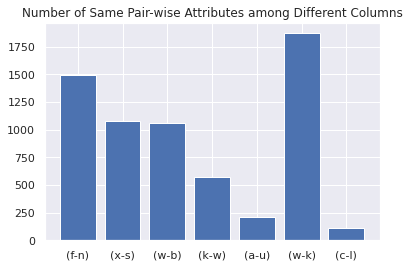

In [ ]:
#Relationship among Attributes

group1=dataset.groupby(['Bruises','Odor'])
n1=len(group1.get_group(("f","n")))

group2=dataset.groupby(['CapShape','CapSurface'])
n2=len(group2.get_group(("x","s")))

group3=dataset.groupby(['GillSpacing','GillSize'])
n3=len(group3.get_group(("w","b")))

group4=dataset.groupby(['StalkSurfaceBelowRing','StalkColorBelowRing'])
n4=len(group4.get_group(("k","w")))

group5=dataset.groupby(['GillAttachment','VeilType'])
n5=len(group5.get_group(("a","p")))

group6=dataset.groupby(['VeilColor','SporePrintColor'])
n6=len(group6.get_group(("w","k")))

group7=dataset.groupby(['Population','Habitat'])
n7=len(group7.get_group(("c","l")))

x=["(f-n)","(x-s)","(w-b)","(k-w)","(a-u)","(w-k)","(c-l)"]
y=[n1,n2,n3,n4,n5,n6,n7]
plt.bar(x,y,align='center')
plt.title("Number of Same Pair-wise Attributes among Different Columns")
plt.show()

In [ ]:
dataset.shape

(8124, 23)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Class                  8124 non-null   object
 1   CapShape               8124 non-null   object
 2   CapSurface             8124 non-null   object
 3   CapColor               8124 non-null   object
 4   Bruises                8124 non-null   object
 5   Odor                   8124 non-null   object
 6   GillAttachment         8124 non-null   object
 7   GillSpacing            8124 non-null   object
 8   GillSize               8124 non-null   object
 9   GillColor              8124 non-null   object
 10  StalkShape             8124 non-null   object
 11  StalkRoot              8124 non-null   object
 12  StalkSurfaceAboveRing  8124 non-null   object
 13  StalkSurfaceBelowRing  8124 non-null   object
 14  StalkColorAboveRing    8124 non-null   object
 15  StalkColorBelowRing  

In [ ]:
dataset.groupby('Class').size()

Class
e    4208
p    3916
dtype: int64

In [ ]:
dataset['StalkRoot']

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: StalkRoot, Length: 8124, dtype: object

In [ ]:
# Cleaning

dataset['StalkRoot'].replace(['?'],0,inplace=True)
dataset

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
dataset['StalkRoot']

0       e
1       c
2       c
3       e
4       e
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: StalkRoot, Length: 8124, dtype: object

In [ ]:
dataset['StalkRoot'].value_counts()

b    3776
0    2480
e    1120
c     556
r     192
Name: StalkRoot, dtype: int64

In [ ]:
dataset['StalkRoot'].replace({0:'b'},inplace=True)
dataset

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
dataset['StalkRoot'].value_counts()

b    6256
e    1120
c     556
r     192
Name: StalkRoot, dtype: int64

In [ ]:
dataset

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# LabelEncoding

le=LabelEncoder()
dataset.Class=le.fit_transform(dataset.Class)
dataset.CapShape=le.fit_transform(dataset.CapShape)
dataset.CapSurface=le.fit_transform(dataset.CapSurface)
dataset.CapColor=le.fit_transform(dataset.CapColor)
dataset.Bruises=le.fit_transform(dataset.Bruises)
dataset.Odor=le.fit_transform(dataset.Odor)
dataset.GillAttachment=le.fit_transform(dataset.GillAttachment)
dataset.GillSpacing=le.fit_transform(dataset.GillSpacing)
dataset.GillSize=le.fit_transform(dataset.GillSize)
dataset.GillColor=le.fit_transform(dataset.GillColor)
dataset.StalkShape=le.fit_transform(dataset.StalkShape)
dataset.StalkRoot=le.fit_transform(dataset.StalkRoot)
dataset.StalkSurfaceAboveRing=le.fit_transform(dataset.StalkSurfaceAboveRing)
dataset.StalkSurfaceBelowRing=le.fit_transform(dataset.StalkSurfaceBelowRing)
dataset.StalkColorAboveRing=le.fit_transform(dataset.StalkColorAboveRing)
dataset.StalkColorBelowRing=le.fit_transform(dataset.StalkColorBelowRing)
dataset.VeilType=le.fit_transform(dataset.VeilType)
dataset.VeilColor=le.fit_transform(dataset.VeilColor)
dataset.RingNumber=le.fit_transform(dataset.RingNumber)
dataset.RingType=le.fit_transform(dataset.RingType)
dataset.SporePrintColor=le.fit_transform(dataset.SporePrintColor)
dataset.Population=le.fit_transform(dataset.Population)
dataset.Habitat=le.fit_transform(dataset.Habitat)

dataset

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
dataset.describe()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


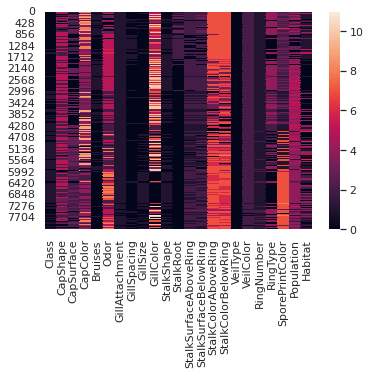

In [ ]:
# Visualization

sns.heatmap(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


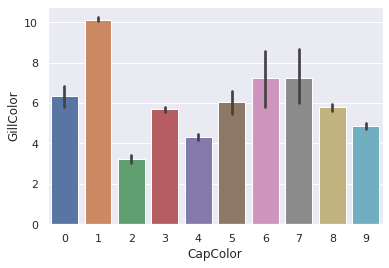

In [ ]:
sns.barplot(dataset['CapColor'],dataset['GillColor'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


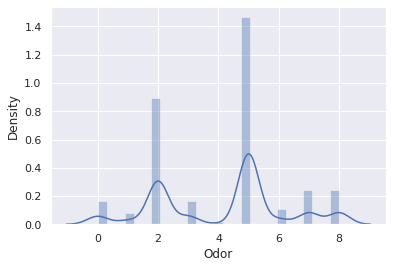

In [ ]:
sns.distplot(dataset['Odor'])

In [ ]:
array=dataset.values
array

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]])

In [ ]:
X=array[:,1:23]
Y=array[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [ ]:
# Algorithm(1) KNN

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
acc1=accuracy_score(Y_test, predictions)
print("Accuracy = ",acc1,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions),"\n")

Accuracy =  0.9995898277276456 

Confusion Matrix = 
 [[1252    0]
 [   1 1185]] 

Classification Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438
 



In [ ]:
# Algorithm(2) Naive Bayes

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions1 = classifier.predict(X_test)
acc2=accuracy_score(Y_test, predictions1)
print("Accuracy = ",acc2,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions1),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions1),"\n")

Accuracy =  0.8982772764561116 

Confusion Matrix = 
 [[1112  140]
 [ 108 1078]] 

Classification Report = 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1252
           1       0.89      0.91      0.90      1186

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438
 



In [ ]:
# Algorithm(3) Logistic Regression

loreg = LogisticRegression()
loreg.fit(X_train, Y_train)
predictions2 = loreg.predict(X_test)
acc3=accuracy_score(Y_test, predictions2)
print("Accuracy = ",acc3,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions2),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions2),"\n")

Accuracy =  0.963084495488105 

Confusion Matrix = 
 [[1207   45]
 [  45 1141]] 

Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1252
           1       0.96      0.96      0.96      1186

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438
 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Algorithm(4) Decision Tree

tree = DecisionTreeClassifier(criterion='gini',random_state=0)
tree.fit(X_train, Y_train)
predictions3 = tree.predict(X_test)
acc4=accuracy_score(Y_test, predictions3)
print("Accuracy = ",acc4,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions3),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions3),"\n")

Accuracy =  1.0 

Confusion Matrix = 
 [[1252    0]
 [   0 1186]] 

Classification Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438
 



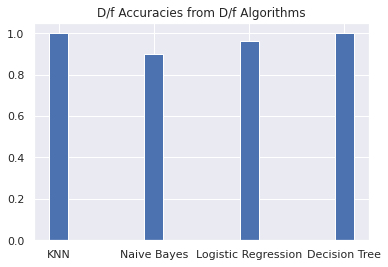

In [ ]:
x=["KNN","Naive Bayes","Logistic Regression","Decision Tree"]
y=[acc1,acc2,acc3,acc4]
plt.bar(x,y,width=0.2)
plt.title("D/f Accuracies from D/f Algorithms")
plt.show()